# Linear regression #

In [3]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# get data

data = pd.read_csv('headbrain.csv')
data.head()


,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [6]:
# declaring x axis attribute and y axis attribute

x = data['Head Size(cm^3)'].values
y =   data['Brain Weight(grams)'].values

In [7]:
# Finding the mean of x and y 

x_mean = np.mean(x)
y_mean = np.mean(y)

In [9]:
# Finding slope using particular formula for y = mx + c

n = len(x)

numer = 0
denom =  0

for i in range(n):
    numer += (x[i] - x_mean) * (y[i] - y_mean)
    denom += (x[i] - x_mean) ** 2
m = numer/denom
c = y_mean - m * x_mean
print(f'The equation is y = {m}x + {c}')


The equation is y = 0.26342933948939945x + 325.57342104944223


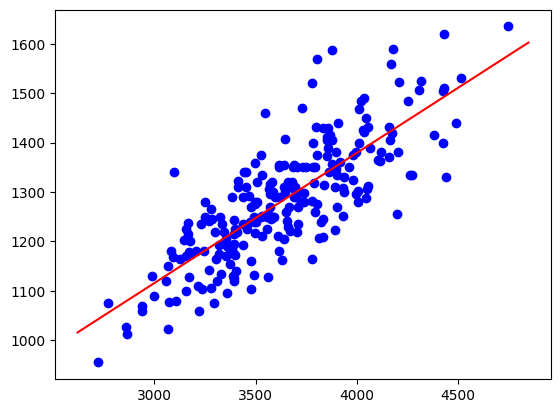

In [11]:
# TO draw a graph 

min_x = np.min(x)-100
max_x = np.max(x)+100

#definig the equation of line

X = np.linspace(min_x,max_x,1000)
Y =  m * X + c

# Plotting the line
plt.plot(X,Y,color = 'red')
plt.scatter(x,y,color = "blue")
plt.show()


In [20]:
# R Square error , finding the how model is coorect , checking or validation of model

ss_t = 0 
ss_r = 0
for i in range(n):
    y_pred = c + m * x[i]
    ss_t += (y[i] - y_pred) ** 2
    ss_r += (y[i] - y_mean) ** 2
r  = 1 - ss_t/ss_r
print(f'error is {r}')

error is [0.63931172]


# Linear regresion using scikit-learn

In [19]:
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error


x = x.reshape(-1, 1)
reg = LinearRegression()
reg = reg.fit(x,y)
pred =  reg.predict(x)

r2_score = reg.score(x,y)
print(f'error is {r2_score}')



error is 0.639311719957


# Logistic regression using Titanic dataset , (Classifiction problem , classification learning)

### step 1: Getting data

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import math

titanic_data = pd.read_csv('Titanic-Dataset.csv')
titanic_data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Step 2: Analysing the data

<Axes: xlabel='Survived', ylabel='count'>

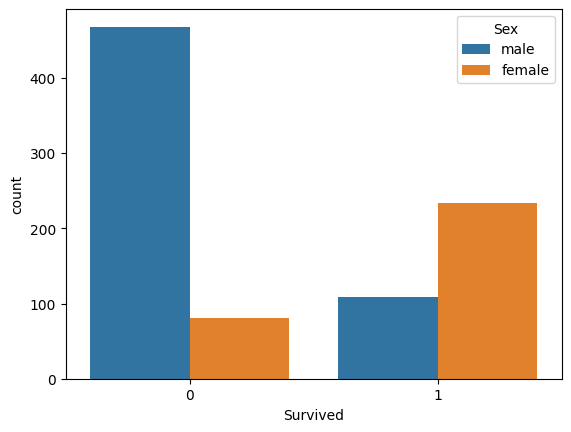

In [9]:
sns.countplot(x='Survived',hue='Sex',data = titanic_data)


## here we get that most of them did not survived are males , most of the females are survived


<Axes: xlabel='Survived', ylabel='count'>

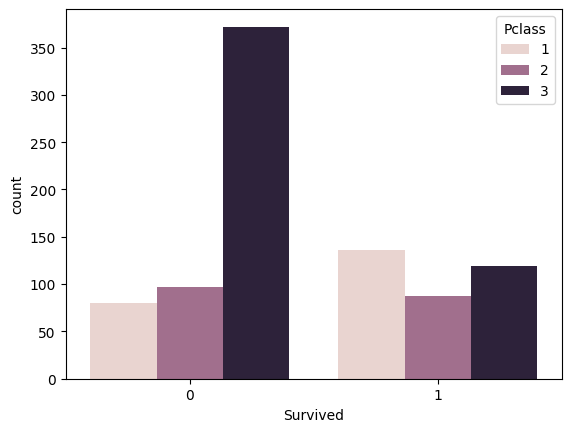

In [10]:
sns.countplot(x='Survived',hue='Pclass',data = titanic_data)

## Here we get that most of the survived are first class people most of third class are not survivved

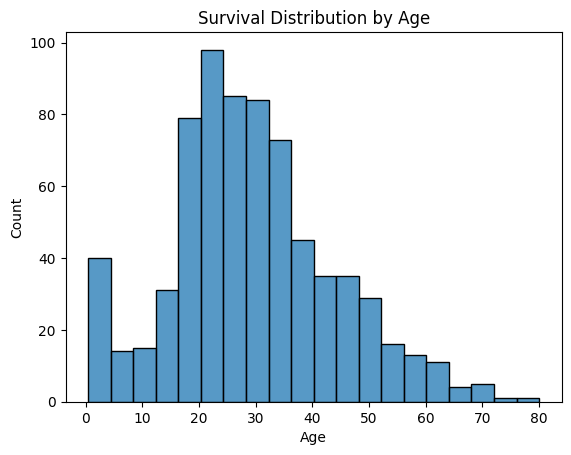

In [12]:
sns.histplot(data=titanic_data, x='Age')

plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Survival Distribution by Age')
plt.show()


## Here we get that most of them survived are are in range of 20 to 40 ( youngsters)

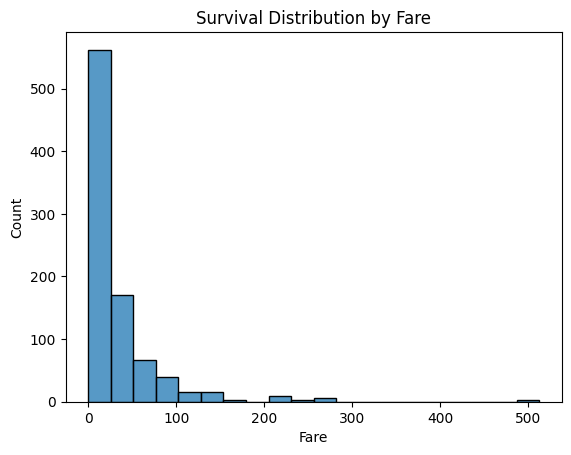

In [20]:
sns.histplot(data=titanic_data, x='Fare',bins = 20)

plt.xlabel('Fare')
plt.ylabel('Count')
plt.title('Survival Distribution by Fare')
plt.show()

In [23]:
min_f = titanic_data['Fare'].min()
max_f = titanic_data['Fare'].max()

print(f'{min_f} is min and max is {max_f}')

0.0 is min and max is 512.3292


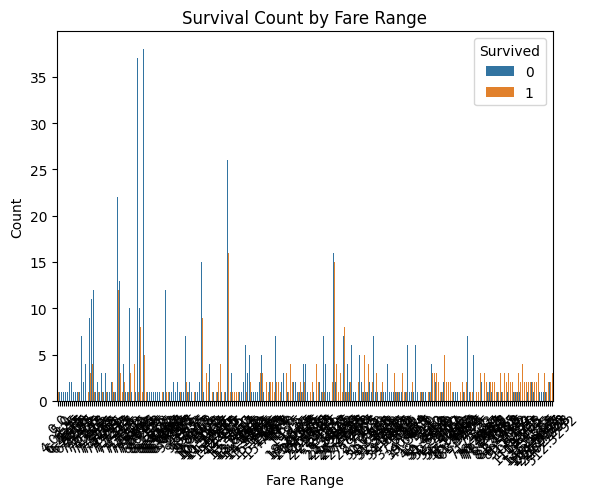

In [26]:
sns.countplot(x='Fare', hue='Survived', data=titanic_data)

plt.xlabel('Fare Range')
plt.ylabel('Count')
plt.title('Survival Count by Fare Range')
plt.xticks(rotation=45)
plt.show()

## By this we get that , we dont have any relation betweeen , survival and Fare

### Step 3: Data wrangling , Process of cleaning the or removeing unwanted data

In [27]:
# Removing Nan placed column or adding data to it , 

titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [29]:
titanic_data.drop('Cabin',axis = 1 , inplace =  True)


In [30]:
# Drop the column which have null value

titanic_data.dropna( inplace =  True)

In [31]:
titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [38]:
sex = pd.get_dummies(titanic_data['Sex'],drop_first = True)
sex

,male
0,True
1,False
2,False
3,False
4,True
...,...
885,False
886,True
887,False
889,True


In [34]:
embark  = pd.get_dummies(titanic_data['Embarked'],drop_first = True)
embark

,Q,S
0,False,True
1,False,False
2,False,True
3,False,True
4,False,True
...,...,...
885,True,False
886,False,True
887,False,True
889,False,False


In [35]:
pcl  = pd.get_dummies(titanic_data['Pclass'],drop_first = True)
pcl

,2,3
0,False,True
1,False,False
2,False,True
3,False,False
4,False,True
...,...,...
885,False,True
886,True,False
887,False,False
889,False,False


In [44]:
titanic_data.drop(['Name','Embarked','PassengerId','Ticket','Sex'],axis = 1, inplace = True)
titanic_data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,2,3,Q,S,male,2,3,Q,S,male
0,0,3,22.0,1,0,7.2500,False,True,False,True,True,False,True,False,True,True
1,1,1,38.0,1,0,71.2833,False,False,False,False,False,False,False,False,False,False
2,1,3,26.0,0,0,7.9250,False,True,False,True,False,False,True,False,True,False
3,1,1,35.0,1,0,53.1000,False,False,False,True,False,False,False,False,True,False
4,0,3,35.0,0,0,8.0500,False,True,False,True,True,False,True,False,True,True


In [49]:
# Remove duplicate columns
titanic_data = titanic_data.loc[:, ~titanic_data.columns.duplicated()]
titanic_data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,2,3,Q,S,male
0,0,3,22.0,1,0,7.2500,False,True,False,True,True
1,1,1,38.0,1,0,71.2833,False,False,False,False,False
2,1,3,26.0,0,0,7.9250,False,True,False,True,False
3,1,1,35.0,1,0,53.1000,False,False,False,True,False
4,0,3,35.0,0,0,8.0500,False,True,False,True,True


### Step 4: Training data , build Model

In [50]:
x =  titanic_data.drop('Survived', axis = 1)
y = titanic_data['Survived']

In [52]:
from sklearn.model_selection import train_test_split


In [53]:
# Assuming you have features X and target y
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [69]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
# Scale the data
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)


logmodel = LogisticRegression(max_iter=200)

In [70]:

# Convert to NumPy array
# x_train = x_train.values
# x_test = x_test.values
logmodel.fit(x_train_scaled, y_train)
pred = logmodel.predict(x_test_scaled)



### step 5: Testing and finding performance and accuracy of the model 

In [74]:
from sklearn.metrics import classification_report
classification_report( y_test,pred)

'              precision    recall  f1-score   support\n\n           0       0.77      0.91      0.83        80\n           1       0.85      0.65      0.74        63\n\n    accuracy                           0.80       143\n   macro avg       0.81      0.78      0.79       143\nweighted avg       0.81      0.80      0.79       143\n'

In [75]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, pred)

## google about confusion matrix , here we get that , 73 are pred no and actual no , 43 are py and ay , 7 are py and an , and 20 are pn and ay

array([[73,  7],
       [22, 41]])

In [76]:
from sklearn.metrics  import accuracy_score
accuracy_score(y_test, pred)


0.7972027972027972

In [ ]:
import csv
import random
import math

# Load CSV file and convert each element to a float
def loadCsv(filename):
    # Open the CSV file
    lines = csv.reader(open(filename, 'r'))
    # Convert lines into a list
    dataset = list(lines)
    # Convert string values to floats
    for i in range(len(dataset)):
        dataset[i] = [float(x) for x in dataset[i]]
    # Return the processed dataset
    return dataset

# Split dataset into training and testing sets based on a split ratio
def splitDataset(dataset, splitRatio):
    # Calculate size of training set
    trainSize = int(len(dataset) * splitRatio)
    # Create empty training set
    trainSet = []
    # Make a copy of the dataset to avoid modifying the original dataset
    copy = list(dataset)
    # Randomly select instances for the training set
    while len(trainSet) < trainSize:
        index = random.randrange(len(copy))  # Random index selection
        trainSet.append(copy.pop(index))  # Remove instance from copy and add to training set
    # Return both training set and remaining test set
    return [trainSet, copy]

# Separate dataset by class (i.e., group data based on the target label)
def separateByClass(dataset):
    separated = {}  # Dictionary to store classes
    # Iterate over each instance in the dataset
    for i in range(len(dataset)):
        vector = dataset[i]  # Current instance
        class_value = vector[-1]  # Class label (last value in row)
        # If the class value is not already in the dictionary, add it
        if class_value not in separated:
            separated[class_value] = []
        # Append the instance to the list corresponding to its class
        separated[class_value].append(vector)
    # Return dictionary with class-separated data
    return separated

# Calculate the mean (average) of a list of numbers
def mean(numbers):
    # Sum the numbers and divide by the count
    return sum(numbers) / float(len(numbers))

# Calculate the standard deviation of a list of numbers
def stdev(numbers):
    avg = mean(numbers)  # Get the mean of the numbers
    # Calculate variance (average squared difference from the mean)
    variance = sum([pow(x - avg, 2) for x in numbers]) / float(len(numbers) - 1)
    # Return the square root of the variance (standard deviation)
    return math.sqrt(variance)

# Summarize a dataset by calculating the mean and standard deviation for each attribute
def summarize(dataset):
    # For each attribute in the dataset, calculate the mean and standard deviation
    summaries = [(mean(attribute), stdev(attribute)) for attribute in zip(*dataset)]
    # Remove the summary of the last column (class label)
    del summaries[-1]
    # Return summaries for each attribute (excluding the class label)
    return summaries

# Summarize dataset separated by class
def summarizeByClass(dataset):
    # Separate the dataset by class
    separated = separateByClass(dataset)
    summaries = {}
    # For each class, summarize its instances
    for classValue, instances in separated.items():
        summaries[classValue] = summarize(instances)  # Store the mean and stdev for each class
    # Return the summarized statistics for each class
    return summaries

# Calculate Gaussian probability density function for a given x value, mean, and standard deviation
def calculateProbability(x, mean, stdev):
    exponent = math.exp(-(math.pow(x - mean, 2) / (2 * math.pow(stdev, 2))))
    # Return the probability using the Gaussian formula
    return (1 / (math.sqrt(2 * math.pi) * stdev)) * exponent

# Calculate the probability of each class for a given input vector
def calculateClassProbabilities(summaries, inputVector):
    probabilities = {}  # Store class probabilities
    # Iterate through each class and its summaries
    for classValue, classSummaries in summaries.items():
        probabilities[classValue] = 1  # Initialize probability to 1
        # Multiply the probabilities of each attribute
        for i in range(len(classSummaries)):
            mean, stdev = classSummaries[i]  # Get mean and stdev for each attribute
            x = inputVector[i]  # Get the input value for the corresponding attribute
            probabilities[classValue] *= calculateProbability(x, mean, stdev)
    # Return the calculated probabilities for each class
    return probabilities

# Make a prediction for a given input vector
def predict(summaries, inputVector):
    # Calculate probabilities for each class
    probabilities = calculateClassProbabilities(summaries, inputVector)
    bestLabel, bestProb = None, -1  # Initialize best label and probability
    # Find the class with the highest probability
    for classValue, probability in probabilities.items():
        if bestLabel is None or probability > bestProb:
            bestProb = probability  # Update best probability
            bestLabel = classValue  # Update best class label
    # Return the class with the highest probability
    return bestLabel

# Get predictions for the test set
def getPredictions(summaries, testSet):
    predictions = []  # List to store predictions
    # Predict the class for each instance in the test set
    for i in range(len(testSet)):
        result = predict(summaries, testSet[i])  # Get predicted class
        predictions.append(result)  # Add to predictions list
    # Return the list of predictions
    return predictions

# Calculate accuracy as the percentage of correct predictions
def getAccuracy(testSet, predictions):
    correct = 0  # Initialize count of correct predictions
    # Compare predictions with actual class values
    for i in range(len(testSet)):
        if testSet[i][-1] == predictions[i]:
            correct += 1  # Increment count if prediction is correct
    # Return accuracy as percentage
    return (correct / float(len(testSet))) * 100.0

# Main function to load data, train model, and test model
def main():
    filename = 'pima-indians-diabetes.data.csv'  # Dataset filename
    splitRatio = 0.67  # Ratio of data to use for training
    dataset = loadCsv(filename)  # Load the dataset
    trainingSet, testSet = splitDataset(dataset, splitRatio)  # Split into train and test sets
    print(f'Split {len(dataset)} rows into train = {len(trainingSet)} and test = {len(testSet)} rows')
    
    # Prepare model by summarizing the training data
    summaries = summarizeByClass(trainingSet)
    
    # Test the model on the test set
    predictions = getPredictions(summaries, testSet)
    
    # Calculate and print the accuracy of the predictions
    accuracy = getAccuracy(testSet, predictions)
    print(f'Accuracy: {accuracy}%')

# Run the main function
main()


In [ ]:
from sklearn import datasets
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

# Load iris dataset
dataset = datasets.load_iris()

# Initialize and train the Gaussian Naive Bayes model
model = GaussianNB()
model.fit(dataset.data, dataset.target)

# Make predictions
expected = dataset.target
predicted = model.predict(dataset.data)

# Display results
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))
